In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data loading

In [2]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# data exploration and preprocessing

In [4]:

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# spliting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [7]:
X_test, X_train, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

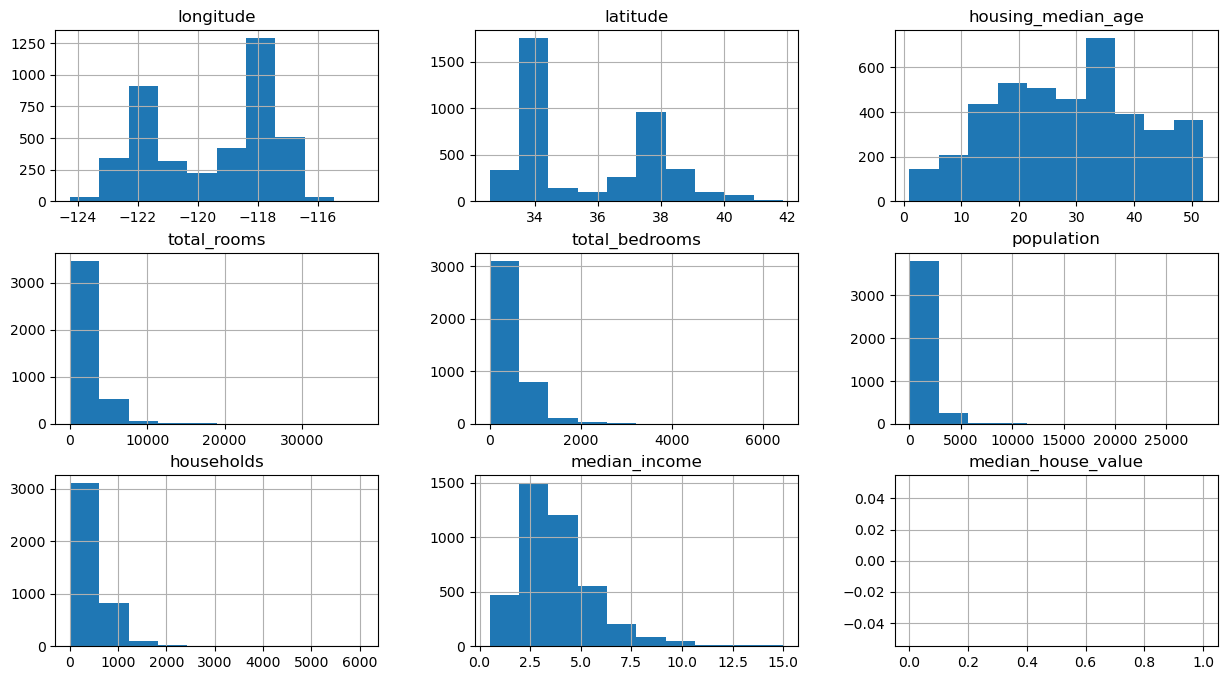

In [9]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15, 8))

In [10]:
train_data.corr()

/tmp/ipykernel_32613/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923455,-0.102453,0.046690,0.069006,0.093609,0.056335,-0.011965,NaN
latitude,-0.923455,1.000000,0.000211,-0.039336,-0.068713,-0.100955,-0.073100,-0.083352,NaN
housing_median_age,-0.102453,0.000211,1.000000,-0.336496,-0.294527,-0.279310,-0.276438,-0.127970,NaN
total_rooms,0.046690,-0.039336,-0.336496,1.000000,0.934443,0.863117,0.918085,0.174255,NaN
total_bedrooms,0.069006,-0.068713,-0.294527,0.934443,1.000000,0.883055,0.980139,-0.019079,NaN
population,0.093609,-0.100955,-0.279310,0.863117,0.883055,1.000000,0.910556,-0.010664,NaN
households,0.056335,-0.073100,-0.276438,0.918085,0.980139,0.910556,1.000000,-0.001897,NaN
median_income,-0.011965,-0.083352,-0.127970,0.174255,-0.019079,-0.010664,-0.001897,1.000000,NaN
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
